## Heart Attack Prediction Model 
## Notebook 1
## Introduction, Solution Overview
## Data Import, Cleaning

---


## Author: Will Wu

## Date: 2025-03-14
---

## **Table of Contents** ##

1. [Project Overview](#1)
2. [Data Science Solution](#2)
3. [Data Dictionary](#3)
4. [Loading and Setup](#4)
5. [Data Cleaning - Stage 1](#5)
    - [Data Quality Check](#5a)
    - [Rearranging and Renaming Columns](#5b)
    - [Dealing with Missing Values - Stage 1](#5c)
        - [Missing Values in Target Variable](#5c1)
        - [Missing Values in Height/Weight/BMI](#5c2)
        - [Missing Values in Rows](#5c3)
        - [Missing Values in Columns](#5c4)
        - [Columns with Considerable Missing Values](#5c5)
    - [Drop Duplicated Rows](#5d)
    - [Summary and Export](#5e)


---

## 1. Project Overview <a class="anchor" id="1"></a>

- **Motivation:**<br>
My interest in this project is deeply personal; having lost my uncle to cardiac arrest and witnessing family members affected by cardiac disease, I often feel anxious about my own risk of having a heart attack, especially during times of high stress, lack of sleep, or insufficient exercise. This experience drives my eagerness to develop a model that can identify individuals at risk of heart attacks, thereby enabling proactive health management.

- **Problem Description:** <br>
Heart attacks are a leading cause of death worldwide, resulting in long-term health issues and substantial financial costs. Current risk assessment tools are limited by their reliance on blood test results and constraints such as the user’s age, which restricts the opportunity to identify individuals at risk of having a heart attack. This project aims to create a more user-friendly and accessible heart attack risk assessment model using readily available features.

- **Affected Groups:** <br>
According to the CDC, approximately 805,000 people in the U.S. experience a heart attack each year, translating to someone suffering a heart attack every 40 seconds. This number underscores a staggering reality: many more people could be suffering from heart attacks when considering global population and undiagnosed cases. Common signs include chest discomfort, shortness of breath, upper body discomfort, and light-headedness. Symptoms can be subtle, particularly in women, who may experience non-painful signs such as fatigue or nausea, which can lead to delays in seeking emergency care. Therefore, it is crucial for individuals to be aware of their heart attack risk and stay vigilant for any relevant symptoms.

---

## 2. Data Science Solution <a class="anchor" id="2"></a>

- **Solution Overview:**<br>
The project aims to develop an early detection model that identifies whether a user is at risk of having a heart attack. The model will utilize accessible features, including basic physical conditions, lifestyle habits, medical history, and vaccination history.
- **Existing Solutions Drawbacks:**<br>
Multiple approaches have been developed to assist healthcare providers in assessing the risk of cardiovascular disease. Atherosclerotic Cardiovascular Disease [(ASCVD) Risk Calculator](https://tools.acc.org/ascvd-risk-estimator-plus/#!/calculate/estimate/) assesses the chances of a person aged 40 to 79 developing heart disease over the next 10 years. Similarly, [The American Heart Association Prevent Online Calculator](https://professional.heart.org/en/guidelines-and-statements/prevent-calculator) assesses the risk of heart failure for users aged 30 to 79.<br>
However, these models impose age restrictions, preventing individuals under 30 or over 80 from accessing them, and they require specific information, such as HDL cholesterol levels, which can only be obtained through blood tests, making these calculators not readily accessible tools.<br> 
One interesting finding during the exploratory data analysis is that age is exponentially correlated with the risk of heart attack; in fact, individuals aged 80 and above have the highest likelihood of experiencing a heart attack among all age groups. Consequently, the most vulnerable population lacks access to the most needed early detection model, emphasizing the necessity of this project.

 - **Machine Learning Solutions:** <br>
This project will employ various machine learning classifiers to identify individuals at risk of having a heart attack. The classification model will make binary predictions ('Yes'/'No) regarding whether the user is likely to face a heart attack.

- **Expected Outcomes and Impact:** <br>
The model is designed to be accessible anytime, anywhere, allowing users to promptly identify their risk of heart attacks. Increased awareness of heart attack symptoms could lead to quicker responses during emergencies, ultimately saving lives. Even a modest reduction in heart attack incidents, such as 1%, could help over 8,000 individuals avoid experiencing a heart attack. With the average healthcare costs associated with heart attacks estimated at over $20,000, this could result in annual savings of approximately $161 million.

- **Source of the Dataset:** <br>
The dataset for this project is sourced from the Centers for Disease Control and Prevention (CDC) Behavioral Risk Factor Surveillance System (BRFSS). This program conducts over 400,000 adult interviews each year through telephone surveys to gather comprehensive data on the health status and risk behaviors of U.S. residents.<br>
For this project, we utilize two specific datasets:<br>
1. [2022 BRFSS Survey Data and Documentation](https://www.cdc.gov/brfss/annual_data/annual_2022.html): This dataset includes information from the 2022 survey, detailing various health-related behaviors, conditions, and demographic factors.
2. [2023 BRFSS Survey Data and Documentation](https://www.cdc.gov/brfss/annual_data/annual_2023.html): This dataset features the latest survey data from 2023, further enriching our analysis with updated health information.

---

## 3. Data Dictionary <a class="anchor" id="3"></a>


The values within each column reflects the respondent's answer to corresponding question.<br>
Refer to the tables below for details regarding the data:
#### Interviewee's Basic Information
| Variable                     | Description                                         | Data Type     |
|:----------------------------|:---------------------------------------------------|:-------------|
| `year`    | Year which observation was recorded                             | Numeric   |
| `sex`                        | Sex of respondent                                   | Categorical   |
| `race_ethnicity_category`    | Race/ethnicity category                             | Categorical   |
| `age_category`               | Age category                                       | Categorical   |
| `state`                      | States in U.S. where respondent resides            | Categorical   |
| `height`          | Reported height in meters                           | Numeric       |
| `weight`       | Reported weight in kilograms                        | Numeric       |
| `bmi`                        | Body Mass Index                                     | Numeric       |

#### Health and Lifestyle Information
| Variable                     | Description                                         | Data Type     |
|:----------------------------|:---------------------------------------------------|:-------------|
| `alcohol_drinkers`          | Adults who reported at least one drink in 30 days | Categorical   |
| `general_health`            | Respondent's general health condition                | Categorical   |
| `smoker_status`             | Respondent's smoking status                         | Categorical   |
| `e_cigarette_usage`         | Respondent's e-cigarette usage status              | Categorical   |
| `physical_activities`       | Participation in physical activities in the past month              | Categorical   |
| `physical_health_days`      | Poor physical health days in past 30 days         | Categorical   |
| `mental_health_days`        | Poor mental health days in past 30 days           | Categorical   |
| `stress_levels`        | How often does respondents feel stress in past 30 days         | Categorical   |

#### Medical History:<br>
| Variable                     | Description                                         | Data Type     |
|:----------------------------|:---------------------------------------------------|:-------------|
| `had_angina`                | (Ever told) had angina or coronary heart disease?  | Categorical   |
| `had_stroke`                | (Ever told) had a stroke                           | Categorical   |
| `had_asthma`                | (Ever told) had asthma                             | Categorical   |
| `had_skin_cancer`           | (Ever told) had non-melanoma skin cancer          | Categorical   |
| `had_copd`                  | (Ever told) had COPD or related diseases           | Categorical   |
| `had_diabetes`              | (Ever told) had diabetes                           | Categorical   |
| `had_kidney_disease`        | (Ever told) had kidney disease (not stones)       | Categorical   |
| `had_depressive_disorder`    | (Ever told) had a depressive disorder              | Categorical   |
| `had_arthritis`              | (Ever told) had some form of arthritis             | Categorical   |
| `deaf_or_hard_of_hearing`   | Deaf or serious difficulty hearing                  | Categorical   |
| `blind_or_vision_difficulty` | Blind or serious difficulty seeing                  | Categorical   |
| `difficulty_walking`        | Serious difficulty walking or climbing stairs       | Categorical   |
| `difficulty_concentrating`   | Difficulty concentrating due to physical or mental conditions | Categorical   |
| `difficulty_dressing_bathing`| Difficulty dressing or bathing                      | Categorical   |
| `difficulty_errands`        | Difficulty doing errands due to physical or mental conditions | Categorical   |

#### Health Assessment Information
| Variable                     | Description                                         | Data Type     |
|:----------------------------|:---------------------------------------------------|:-------------|
| `last_checkup_time`         | Time since last routine checkup                    | Categorical   |
| `chest_scan`                | Have you ever had a CT or CAT scan of your chest? | Categorical   |

#### Vaccination and Drug Use
| Variable                     | Description                                         | Data Type     |
|:----------------------------|:---------------------------------------------------|:-------------|
| `flu_vax`           | Received flu vaccine in the past 12 months         | Categorical   |
| `tetanus_vax`      | Received a tetanus shot in the past 10 years       | Categorical   |
| `pneumo_vax`           | Ever had a pneumonia shot                           | Categorical   |

#### Field of Interest
| Variable                     | Description                                         | Data Type     |
|:----------------------------|:---------------------------------------------------|:-------------|
| `had_heart_attack`           | (Ever told) you had a heart attack? | Categorical   |

---

## 4. Setup and Loading<a class="anchor" id="4"></a>

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Default plot settings

In [2]:
# Configure Seaborn to use 'darkgrid' as the default background style
sns.set_style('darkgrid')

In [3]:
# Setting figure size, fontsize globally in the notebook
plt.rcParams["figure.figsize"] = (6.0, 6.0)

- Load the dataset

In [4]:
# Load the dataset
heart_attack_raw2022 = pd.read_csv("../data/processed/heart_attack_with_nan_2023.csv", low_memory=False)
heart_attack_raw2023 = pd.read_csv("../data/processed/heart_attack_with_nan_2022.csv", low_memory=False)


In [5]:
# Add a year column for each dataset to record the year data was collected
heart_attack_raw2022['Year'] = 2022
heart_attack_raw2023['Year'] = 2023

In [6]:
# Peek at the top top five rows 2022 dataframe
heart_attack_raw2022.head().T

0  \
State                                                                Alabama   
Sex                                                                   Female   
GeneralHealth                                                      Very good   
PhysicalHealthDays                                                       0.0   
MentalHealthDays                                                         0.0   
StressLevels                                                           Never   
LastCheckupTime            Within past 2 years (1 year but less than 2 ye...   
PhysicalActivities                                                        No   
HadHeartAttack                                                            No   
HadAngina                                                                 No   
HadStroke                                                                 No   
HadAsthma                                                                 No   
HadSkinCancer                                                             No   
HadCOPD                                                                   No   
HadDepressiveDisorder                                                     No   
HadKidneyDisease                                                          No   
HadArthritis                                                              No   
HadDiabetes                                                              Yes   
DeafOrHardOfHearing                                                       No   
BlindOrVisionDifficulty                                                   No   
DifficultyConcentrating                                                   No   
DifficultyWalking                                                        Yes   
DifficultyDressingBathing                                                 No   
DifficultyErrands                                                         No   
SmokerStatus                                                    Never smoked   
ECigaretteUsage                    Never used e-cigarettes in my entire life   
ChestScan                                                                NaN   
RaceEthnicityCategory                               White only, Non-Hispanic   
AgeCategory                                                  Age 80 or older   
HeightInMeters                                                           1.6   
WeightInKilograms                                                      78.02   
BMI                                                                    30.47   
AlcoholDrinkers                                                           No   
FluVaxLast12                                                              No   
PneumoVaxEver                                                             No   
TetanusLast10Tdap                                                        NaN   
Year                                                                    2022   

                                                                           1  \
State                                                                Alabama   
Sex                                                                   Female   
GeneralHealth                                                      Very good   
PhysicalHealthDays                                                       0.0   
MentalHealthDays                                                         0.0   
StressLevels                                                           Never   
LastCheckupTime            Within past 2 years (1 year but less than 2 ye...   
PhysicalActivities                                                       Yes   
HadHeartAttack                                                            No   
HadAngina                                                                 No   
HadStroke                                                                 No   
HadAsthma                                                                 

In [7]:
# peek at the top top five rows 2023 dataframe
heart_attack_raw2023.head().T

0  \
State                                                                Alabama   
Sex                                                                   Female   
GeneralHealth                                                      Very good   
PhysicalHealthDays                                                       0.0   
MentalHealthDays                                                         0.0   
StressLevels                                                          Rarely   
LastCheckupTime            Within past year (anytime less than 12 months ...   
PhysicalActivities                                                        No   
HadHeartAttack                                                            No   
HadAngina                                                                 No   
HadStroke                                                                 No   
HadAsthma                                                                 No   
HadSkinCancer                                                             No   
HadCOPD                                                                   No   
HadDepressiveDisorder                                                     No   
HadKidneyDisease                                                          No   
HadArthritis                                                              No   
HadDiabetes                                                              Yes   
DeafOrHardOfHearing                                                       No   
BlindOrVisionDifficulty                                                   No   
DifficultyConcentrating                                                   No   
DifficultyWalking                                                         No   
DifficultyDressingBathing                                                 No   
DifficultyErrands                                                         No   
SmokerStatus                                                    Never smoked   
ECigaretteUsage                                       Not at all (right now)   
ChestScan                                                                 No   
RaceEthnicityCategory                               White only, Non-Hispanic   
AgeCategory                                                  Age 80 or older   
HeightInMeters                                                           NaN   
WeightInKilograms                                                        NaN   
BMI                                                                      NaN   
AlcoholDrinkers                                                           No   
FluVaxLast12                                                             Yes   
PneumoVaxEver                                                             No   
TetanusLast10Tdap          Yes, received tetanus shot but not sure what type   
Year                                                                    2023   

                                                                           1  \
State                                                                Alabama   
Sex                                                                   Female   
GeneralHealth                                                      Excellent   
PhysicalHealthDays                                                       0.0   
MentalHealthDays                                                         0.0   
StressLevels                                                           Never   
LastCheckupTime                                                        Never   
PhysicalActivities                                                        No   
HadHeartAttack                                                            No   
HadAngina                                                                 No   
HadStroke                                                                 No   
HadAsthma                                                                 

In [8]:
# Concatenate both files to get one single file
heart_attack_raw = pd.concat((heart_attack_raw2022, heart_attack_raw2023), axis=0)

In [9]:
# Sanity Check
print(f'Shape of heart_attack_raw2022: {heart_attack_raw2022.shape}')
print(f'Shape of heart_attack_raw2023: {heart_attack_raw2023.shape}')
print(f'Shape of concatenated dataframe: {heart_attack_raw.shape}')

Shape of heart_attack_raw2022: (433323, 37)
Shape of heart_attack_raw2023: (445132, 37)
Shape of concatenated dataframe: (878455, 37)


In [10]:
# Check the head of top five rows
heart_attack_raw.head().T

0  \
State                                                                Alabama   
Sex                                                                   Female   
GeneralHealth                                                      Very good   
PhysicalHealthDays                                                       0.0   
MentalHealthDays                                                         0.0   
StressLevels                                                           Never   
LastCheckupTime            Within past 2 years (1 year but less than 2 ye...   
PhysicalActivities                                                        No   
HadHeartAttack                                                            No   
HadAngina                                                                 No   
HadStroke                                                                 No   
HadAsthma                                                                 No   
HadSkinCancer                                                             No   
HadCOPD                                                                   No   
HadDepressiveDisorder                                                     No   
HadKidneyDisease                                                          No   
HadArthritis                                                              No   
HadDiabetes                                                              Yes   
DeafOrHardOfHearing                                                       No   
BlindOrVisionDifficulty                                                   No   
DifficultyConcentrating                                                   No   
DifficultyWalking                                                        Yes   
DifficultyDressingBathing                                                 No   
DifficultyErrands                                                         No   
SmokerStatus                                                    Never smoked   
ECigaretteUsage                    Never used e-cigarettes in my entire life   
ChestScan                                                                NaN   
RaceEthnicityCategory                               White only, Non-Hispanic   
AgeCategory                                                  Age 80 or older   
HeightInMeters                                                           1.6   
WeightInKilograms                                                      78.02   
BMI                                                                    30.47   
AlcoholDrinkers                                                           No   
FluVaxLast12                                                              No   
PneumoVaxEver                                                             No   
TetanusLast10Tdap                                                        NaN   
Year                                                                    2022   

                                                                           1  \
State                                                                Alabama   
Sex                                                                   Female   
GeneralHealth                                                      Very good   
PhysicalHealthDays                                                       0.0   
MentalHealthDays                                                         0.0   
StressLevels                                                           Never   
LastCheckupTime            Within past 2 years (1 year but less than 2 ye...   
PhysicalActivities                                                       Yes   
HadHeartAttack                                                            No   
HadAngina                                                                 No   
HadStroke                                                                 No   
HadAsthma                                                                 

___


## 5. Data Cleaning - Stage 1 <a class="anchor" id="5"></a>


### 5.1 Data Quality Check <a class="anchor" id="5a"></a>

- Review the basic information of the dataset

In [11]:
# Get the shape
print(f'The dimension of the dataset is: {heart_attack_raw.shape[0]} rows {heart_attack_raw.shape[1]} columns.')

The dimension of the dataset is: 878455 rows 37 columns.


In [12]:
# check the info ()
heart_attack_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878455 entries, 0 to 445131
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      878455 non-null  object 
 1   Sex                        878455 non-null  object 
 2   GeneralHealth              877702 non-null  object 
 3   PhysicalHealthDays         856743 non-null  float64
 4   MentalHealthDays           861280 non-null  float64
 5   StressLevels               473277 non-null  object 
 6   LastCheckupTime            877106 non-null  object 
 7   PhysicalActivities         876111 non-null  object 
 8   HadHeartAttack             877867 non-null  object 
 9   HadAngina                  869819 non-null  object 
 10  HadStroke                  875424 non-null  object 
 11  HadAsthma                  874981 non-null  object 
 12  HadSkinCancer              877838 non-null  object 
 13  HadCOPD                    877849 

In [13]:
# check statistical description
heart_attack_raw.describe()

PhysicalHealthDays  MentalHealthDays  HeightInMeters  \
count       856743.000000     861280.000000   827662.000000   
mean             4.414338          4.370669        1.702612   
std              8.757745          8.354661        0.107309   
min              0.000000          0.000000        0.910000   
25%              0.000000          0.000000        1.630000   
50%              0.000000          0.000000        1.700000   
75%              4.000000          5.000000        1.780000   
max             30.000000         30.000000        2.410000   

       WeightInKilograms            BMI           Year  
count      802226.000000  789114.000000  878455.000000  
mean           82.980921      28.504678    2022.506721  
std            21.394087       6.548509       0.499955  
min            22.680000      12.020000    2022.000000  
25%            68.040000      24.120000    2022.000000  
50%            80.740000      27.410000    2023.000000  
75%            95.250000      31.660000    2023.000000  
max           292.570000      99.840000    2023.000000

- **Check categorical and numeric columns**

In [14]:
# get categorical columns
cat_cols = heart_attack_raw.select_dtypes(include='object').columns
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

Number of categorical columns: 31
Categorical columns: Index(['State', 'Sex', 'GeneralHealth', 'StressLevels', 'LastCheckupTime',
       'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap'],
      dtype='object')


In [15]:
# get numeric columns
num_cols = heart_attack_raw.select_dtypes(include='number').columns
print(f'Number of numeric columns: {len(num_cols)}')
print(f'Numeric columns: {num_cols}')

Number of numeric columns: 6
Numeric columns: Index(['PhysicalHealthDays', 'MentalHealthDays', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'Year'],
      dtype='object')


- **Check Missing Values - in columns**

In [16]:
# Missing value count and percentage
missing_value_df = pd.DataFrame({
    'Missing Value Count': heart_attack_raw.isna().sum().sort_values(ascending=False),
    'Missing Value Percentage': ((heart_attack_raw.isna().sum()/heart_attack_raw.shape[0]).sort_values(ascending=False) * 100).round(2)
})
missing_value_df


Missing Value Count  Missing Value Percentage
TetanusLast10Tdap                       466855                     53.15
ChestScan                               448526                     51.06
StressLevels                            405178                     46.12
BMI                                      89341                     10.17
WeightInKilograms                        76229                      8.68
PneumoVaxEver                            75146                      8.55
FluVaxLast12                             73188                      8.33
AlcoholDrinkers                          70356                      8.01
ECigaretteUsage                          58911                      6.71
SmokerStatus                             58524                      6.66
HeightInMeters                           50793                      5.78
DifficultyErrands                        43022                      4.90
DifficultyDressingBathing                40679                      4.63
DifficultyWalking                        39435                      4.49
DifficultyConcentrating                  38001                      4.33
BlindOrVisionDifficulty                  35119                      4.00
DeafOrHardOfHearing                      33060                      3.76
PhysicalHealthDays                       21712                      2.47
MentalHealthDays                         17175                      1.96
AgeCategory                              16858                      1.92
HadAngina                                 8636                      0.98
HadAsthma                                 3474                      0.40
RaceEthnicityCategory                     3447                      0.39
HadStroke                                 3031                      0.35
PhysicalActivities                        2344                      0.27
LastCheckupTime                           1349                      0.15
HadDepressiveDisorder                     1242                      0.14
GeneralHealth                              753                      0.09
HadArthritis                               676                      0.08
HadDiabetes                                625                      0.07
HadSkinCancer                              617                      0.07
HadKidneyDisease                           615                      0.07
HadCOPD                                    606                      0.07
HadHeartAttack                             588                      0.07
State                                        0                      0.00
Sex                                          0                      0.00
Year                                         0                      0.00

In [17]:
# Calculate the percentage of rows that contain missing values
print(f' {heart_attack_raw.isna().any(axis=1).mean():.1%} of rows contain at least one missing value.')

# Calculate the percentage of columns that contain missing values
print(f' {heart_attack_raw.isna().any(axis=0).mean():.1%} of columns contain at least one missing value.')


 74.7% of rows contain at least one missing value.
 91.9% of columns contain at least one missing value.


- **Check Missing Values - in rows**

In [18]:
# calculate missing values in each row, select rows with missing values
missing_value_byrows = heart_attack_raw.isna().sum(axis=1).loc[lambda x: x>0]

# create a dataframe for visualization purpose
missing_value_byrows_df = pd.DataFrame(index=missing_value_byrows.index, data=missing_value_byrows.values, columns=['missing_values_per_observation'])

# use plotly to create the countplot
fig = px.histogram(missing_value_byrows_df, x='missing_values_per_observation',
                   title='Count of Missing Values per Observation')

# add edges to the bars
fig.update_traces(marker=dict(line=dict(width=2, color='black')))

# set layout
fig.update_layout(xaxis=dict(tickvals=list(range(0, 39, 1))), 
                  xaxis_title='Missing Values Per Row',
                  yaxis_title='Count')
fig.show()

**Insights:**
- The spike of 17 missing values per row indicates that further investigation is required.
- Small spike around 8, and observable nan per row between 8 to 17 also warrant attention.

- **Check duplicated data**

In [19]:
# Check duplicated rows
print('Number of duplicated rows:', heart_attack_raw.duplicated().sum())
print(f'Percentage of duplicated rows: {(heart_attack_raw.duplicated().mean()):.2%}')

Number of duplicated rows: 1417
Percentage of duplicated rows: 0.16%


**Data Quality Check Summary:**
| Item | Description      |
|-----------|------------------|
| DataFrame Shape         | The shape of the raw DataFrame is 878455 rows and 37 columns |
| Missing Values in rows        | 1. 75% of the rows contain at least one missing value. 2. A signicicant number of rows contain over 17 missing values.   |
| Missing Values in Columns        | 1. 92% of the columns contain missing values. 2. `TetanusLast10Tdap`, `ChestScan` and `StressLevels` each have over 45% of their values missing.|
| Duplicated rows        | 0.16% of rows contain duplicated information. |

---

### 5.2 Rearranging and Renaming Columns <a class="anchor" id="5b"></a>

In [20]:
# Create a copy of the raw dataset
heart_attack_clean = heart_attack_raw.copy()

- Rearrange Columns: <br>
    Put target variable in the last column, and arrange features by the categories of the information (can be found in Data Dictionary).

In [21]:
# Get column names
heart_attack_clean.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'StressLevels', 'LastCheckupTime',
       'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'Year'],
      dtype='object')

In [22]:
# Rearrange the columns
heart_attack_clean = heart_attack_clean [[
    "Year",
    "Sex",
    "RaceEthnicityCategory",
    "AgeCategory",
    "State",
    "HeightInMeters",
    "WeightInKilograms",
    "BMI",
    "AlcoholDrinkers",
    "GeneralHealth",
    "SmokerStatus",
    "ECigaretteUsage",
    "PhysicalActivities",
    "PhysicalHealthDays",
    "MentalHealthDays",
    "StressLevels",
    "HadAngina",
    "HadStroke",
    "HadAsthma",
    "HadSkinCancer",
    "HadCOPD",
    "HadDiabetes",
    "HadKidneyDisease",
    "HadDepressiveDisorder",
    "HadArthritis",
    "DeafOrHardOfHearing",
    "BlindOrVisionDifficulty",
    "DifficultyWalking",
    "DifficultyConcentrating",
    "DifficultyDressingBathing",
    "DifficultyErrands",
    "LastCheckupTime",
    "ChestScan",
    "FluVaxLast12",
    "TetanusLast10Tdap",
    "PneumoVaxEver",
    "HadHeartAttack"
]]

In [23]:
# Sanity check'
heart_attack_clean.shape

(878455, 37)

- **Rename Columns** <br>
Turn the column names into snake case 

In [24]:
# Turn into snake case
heart_attack_clean.rename(columns={
    'Year':'year',
    'Sex': 'sex',
    'RaceEthnicityCategory': 'race_ethnicity_category',
    'AgeCategory': 'age_category',
    'State': 'state',
    'HeightInMeters': 'height',
    'WeightInKilograms': 'weight',
    'BMI': 'bmi',
    'AlcoholDrinkers': 'alcohol_drinkers',
    'GeneralHealth': 'general_health',
    'SmokerStatus': 'smoker_status',
    'ECigaretteUsage': 'e_cigarette_usage',
    'PhysicalActivities': 'physical_activities',
    'PhysicalHealthDays': 'physical_health_days',
    'MentalHealthDays': 'mental_health_days',
    'StressLevels': 'stress_levels',
    'HadAngina': 'had_angina',
    'HadStroke': 'had_stroke',
    'HadAsthma': 'had_asthma',
    'HadSkinCancer': 'had_skin_cancer',
    'HadCOPD': 'had_copd',
    'HadDiabetes': 'had_diabetes',
    'HadKidneyDisease': 'had_kidney_disease',
    'HadDepressiveDisorder': 'had_depressive_disorder',
    'HadArthritis': 'had_arthritis',
    'DeafOrHardOfHearing': 'deaf_or_hard_of_hearing',
    'BlindOrVisionDifficulty': 'blind_or_vision_difficulty',
    'DifficultyWalking': 'difficulty_walking',
    'DifficultyConcentrating': 'difficulty_concentrating',
    'DifficultyDressingBathing': 'difficulty_dressing_bathing',
    'DifficultyErrands': 'difficulty_errands',
    'LastCheckupTime': 'last_checkup_time',
    'ChestScan': 'chest_scan',
    'FluVaxLast12': 'flu_vax',
    'TetanusLast10Tdap': 'tetanus_vax',
    'PneumoVaxEver': 'pneumo_vax',
    'HadHeartAttack': 'had_heart_attack'
}, inplace=True)

- **Rename categories within the column**<br>
Some of the categories are too lengthy, so I will rename some of the categories

In [25]:
# update categorical and numeric columns
num_cols = heart_attack_clean.select_dtypes(include='number').columns
cat_cols = heart_attack_clean.select_dtypes(include='object').columns

# use for loop to print the value counts of each categorical column
for col in cat_cols:
    print((heart_attack_clean[col].value_counts(normalize=True) * 100).round(2) )
    print('--------' * 10)

sex
Female    52.98
Male      47.02
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
race_ethnicity_category
White only, Non-Hispanic         72.40
Hispanic                          9.85
Black only, Non-Hispanic          7.81
Asian only, Non-Hispanic          2.91
Unknown                           2.69
Multiracial, Non-Hispanic         2.25
Other race only, Non-Hispanic     2.09
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
age_category
Age 65 to 69       10.82
Age 70 to 74       10.10
Age 60 to 64       10.04
Age 80 or older     8.72
Age 55 to 59        8.25
Age 75 to 79        7.78
Age 50 to 54        7.54
Age 40 to 44        6.78
Age 35 to 39        6.46
Age 45 to 49        6.45
Age 18 to 24        6.18
Age 30 to 34        5.87
Age 25 to 29        5.02
Name: proportion, dtype: float64
--------------------------------------------------------------------

In [26]:
# Rename categories within the categorical features
heart_attack_clean['race_ethnicity_category'] = heart_attack_clean['race_ethnicity_category'].replace({
    'White only, Non-Hispanic': 'White',
    'Black only, Non-Hispanic': 'Black',
    'Asian only, Non-Hispanic' : 'Asian',
    'Other race only, Non-Hispanic':  'Other',
    'Multiracial, Non-Hispanic': 'Multiracial'
})

heart_attack_clean['age_category'] = heart_attack_clean['age_category'].replace({
    'Age 65 to 69': '65-69',
    'Age 60 to 64': '60-64',
    'Age 70 to 74': '70-74',
    'Age 55 to 59': '55-59',
    'Age 80 or older': '80+',
    'Age 50 to 54': '50-54',
    'Age 75 to 79': '75-79',
    'Age 40 to 44': '40-44',
    'Age 45 to 49': '45-49',
    'Age 35 to 39': '35-39',
    'Age 18 to 24': '18-24',
    'Age 30 to 34': '30-34',
    'Age 25 to 29': '25-29'
})

heart_attack_clean['smoker_status'] = heart_attack_clean['smoker_status'].replace({
    'Never smoked': 'Never',
    'Former smoker': 'Former',
    'Current smoker - now smokes every day': 'Every day smoker',
    'Current smoker - now smokes some days': 'Some days smoker'
})


heart_attack_clean['e_cigarette_usage'] = heart_attack_clean['e_cigarette_usage'].replace({
    'Never used e-cigarettes in my entire life': 'Never',
    'Not at all (right now)': 'Not using currently',
    'Use them some days': 'Some days user',
    'Use them every day': 'Every day user'
})

heart_attack_clean['had_diabetes'] = heart_attack_clean['had_diabetes'].replace({
    'No, pre-diabetes or borderline diabetes': 'Pre-diabetes',
    'Yes, but only during pregnancy (female)': 'Gestational-diabetes'
})


heart_attack_clean['last_checkup_time'] = heart_attack_clean['last_checkup_time'].replace({
    'Within past year (anytime less than 12 months ago)': 'Past year',
    'Within past 2 years (1 year but less than 2 years ago)': 'Past 1-2 years',
    'Within past 5 years (2 years but less than 5 years ago)': 'Past 2-5 years',
    '5 or more years ago': '5+ years ago'
})

heart_attack_clean['last_checkup_time'] = heart_attack_clean['last_checkup_time'].replace({
    'Within past year (anytime less than 12 months ago)': 'Past year',
    'Within past 2 years (1 year but less than 2 years ago)': 'Past 1-2 years',
    'Within past 5 years (2 years but less than 5 years ago)': 'Past 2-5 years',
    '5 or more years ago': '5+ years ago'
})

heart_attack_clean['tetanus_vax'] = heart_attack_clean['tetanus_vax'].replace({
    'No, did not receive any tetanus shot in the past 10 years': 'No tetanus shot',
    'Yes, received tetanus shot but not sure what type': 'Tetanus shot (unsure type)',
    'Yes, received Tdap': 'Received Tdap',
    'Yes, received tetanus shot, but not Tdap': 'Tetanus shot (not Tdap)'
})

In [27]:
# sanity check
for col in cat_cols:
    print((heart_attack_clean[col].value_counts(normalize=True) * 100).round(2) )
    print('--------' * 10)

sex
Female    52.98
Male      47.02
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
race_ethnicity_category
White          72.40
Hispanic        9.85
Black           7.81
Asian           2.91
Unknown         2.69
Multiracial     2.25
Other           2.09
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
age_category
65-69    10.82
70-74    10.10
60-64    10.04
80+       8.72
55-59     8.25
75-79     7.78
50-54     7.54
40-44     6.78
35-39     6.46
45-49     6.45
18-24     6.18
30-34     5.87
25-29     5.02
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
state
Washington              5.99
New York                4.00
Maryland                3.83
Minnesota               3.76
Ohio                    3.40
Florida                 3.03
Texas                   2.77
Wisconsin               2.74
Calif

The value counts are consistent, so renaming of columns and categories have been successfully implemented.

---


### 5.3 Dealing with Missing Values - Stage 1 <a class="anchor" id="5c"></a>

Missing values pose a critical challenge for this dataset. I have outlined the process in the following steps:

1. **Address Missing Values in the Target Variable:** Prioritize fixing any missing values in the target variable.
2. **Handle Missing Values in Derived Columns:** Resolve missing values in columns that can be calculated directly, such as `bmi`, `height`, and `weight`, without requiring further exploratory data analysis (EDA).
3. **Manage Rows with Significant Missing Data:** Address rows that contain a substantial number of missing values.
4. **Adress Columns with Inconsiderable Missing Values:** Fix columns with negligible missing values using.
5. **Address Columns with Considerable Missing Values:** Investigate the cause of such issues and address with imputation.



In [28]:
# Update missing_values_df with new column name
missing_value_df = pd.DataFrame({
    'Missing Value Count': heart_attack_clean.isna().sum().sort_values(ascending=False),
    'Missing Value Percentage': ((heart_attack_clean.isna().sum()/heart_attack_clean.shape[0]).sort_values(ascending=False) * 100).round(2)
})
missing_value_df

Missing Value Count  Missing Value Percentage
tetanus_vax                               466855                     53.15
chest_scan                                448526                     51.06
stress_levels                             405178                     46.12
bmi                                        89341                     10.17
weight                                     76229                      8.68
pneumo_vax                                 75146                      8.55
flu_vax                                    73188                      8.33
alcohol_drinkers                           70356                      8.01
e_cigarette_usage                          58911                      6.71
smoker_status                              58524                      6.66
height                                     50793                      5.78
difficulty_errands                         43022                      4.90
difficulty_dressing_bathing                40679                      4.63
difficulty_walking                         39435                      4.49
difficulty_concentrating                   38001                      4.33
blind_or_vision_difficulty                 35119                      4.00
deaf_or_hard_of_hearing                    33060                      3.76
physical_health_days                       21712                      2.47
mental_health_days                         17175                      1.96
age_category                               16858                      1.92
had_angina                                  8636                      0.98
had_asthma                                  3474                      0.40
race_ethnicity_category                     3447                      0.39
had_stroke                                  3031                      0.35
physical_activities                         2344                      0.27
last_checkup_time                           1349                      0.15
had_depressive_disorder                     1242                      0.14
general_health                               753                      0.09
had_arthritis                                676                      0.08
had_diabetes                                 625                      0.07
had_skin_cancer                              617                      0.07
had_kidney_disease                           615                      0.07
had_copd                                     606                      0.07
had_heart_attack                             588                      0.07
sex                                            0                      0.00
state                                          0                      0.00
year                                           0                      0.00

---

#### 5.3.1 Missing Values and 'Unknown' category in Target Variable  <a class="anchor" id="5c1"></a>

In [29]:
# Find the number of missing values and unkown in had_heart_attack
(heart_attack_clean['had_heart_attack'].value_counts(normalize=True, dropna=False) * 100).round(2)

had_heart_attack
No         93.83
Yes         5.53
Unknown     0.57
NaN         0.07
Name: proportion, dtype: float64

Two main issues in target variable need to be addressed: 
1. 0.57% of observations have `Unknown` in `had_heart_attack`. Since this project aims to identify the risk of having a heart attack, so the answers will be limited to 'Yes' and 'No' only, the values in 'Unknown' will be dropped.
2. 0.07% of the target variable `had_heart_attack` is missing. Since this proportion is negligibly small and missing values in the target variable could introduce bias into the models, I will drop the observations with missing values.<br>

In [30]:
# Check dataset shape before dropping
print('Dataset shape before dropping is:', heart_attack_clean.shape)

Dataset shape before dropping is: (878455, 37)


In [31]:
# Create a counter to log the total numbers dropped from the raw dataframe
drop_counter = 0

In [32]:
# Get the subset which had_heart_attack is unknown
unknown_heart_attack = heart_attack_clean[heart_attack_clean['had_heart_attack'] == 'Unknown']
unknown_heart_attack.shape[0]

5045

In [33]:
# Count the number of observations to be dropped 
unknown_heart_attack = heart_attack_clean[heart_attack_clean['had_heart_attack'] == 'Unknown']
nan_heart_attack = heart_attack_clean['had_heart_attack'].isna().sum()
drop_count = unknown_heart_attack.shape[0] + nan_heart_attack
drop_counter += drop_count

# Dropped_total_count += drop_count
print('Number of rows to be dropped:', drop_count)
print(f'Dropping {(drop_count / heart_attack_raw.shape[0]):.2%} observations.')

Number of rows to be dropped: 5633
Dropping 0.64% observations.


In [34]:
# Drop unknown category and missing values
heart_attack_clean = heart_attack_clean[(heart_attack_clean['had_heart_attack'] == 'Yes') | 
                                        (heart_attack_clean['had_heart_attack'] == 'No')]

In [35]:
# Sanity check
(heart_attack_clean['had_heart_attack'].value_counts(normalize=True, dropna=False) * 100).round(2)

had_heart_attack
No     94.44
Yes     5.56
Name: proportion, dtype: float64

In [36]:
# Sanity check on updated dataset shape
heart_attack_clean.shape

(872822, 37)

The updated size of the dataset is consistent with expection. This step is now completed.

---

#### 5.3.2 Missing Values in Height/Weight/BMI  <a class="anchor" id="5c2"></a>
**Deal with missing values in the `height`, `weight`，`bmi`:** <br>
- The Body Mass Index (BMI) is calculated using the formula: $\text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}$. As a result, if two of the following columns contain values, we can calculate the missing value in the third column.
- I will first impute missing values in `bmi`, then work on `height` and `weight`.



In [37]:
# Filter observations with missing values in bmi but have values in height and weight
heart_attack_clean[
                    (heart_attack_clean['bmi'].isna() == True) & 
                    (heart_attack_clean['weight'].isna() == False) & 
                    (heart_attack_clean['height'].isna() == False)
                    ]

year     sex race_ethnicity_category age_category           state  \
1026    2022  Female                   White        25-29         Alabama   
1168    2022  Female                Hispanic        40-44         Alabama   
1181    2022  Female                   White        25-29         Alabama   
1408    2022  Female                   White        30-34         Alabama   
1473    2022  Female                Hispanic        35-39         Alabama   
...      ...     ...                     ...          ...             ...   
443163  2023  Female                Hispanic        30-34     Puerto Rico   
443755  2023  Female                   Black        30-34  Virgin Islands   
444195  2023  Female                   Black        25-29  Virgin Islands   
444399  2023  Female                   Black        35-39  Virgin Islands   
444952  2023  Female                Hispanic        40-44  Virgin Islands   

        height  weight  bmi alcohol_drinkers general_health  ...  \
1026      1.68   67.59  NaN               No      Excellent  ...   
1168      1.55   69.85  NaN               No           Good  ...   
1181      1.70   68.04  NaN               No      Excellent  ...   
1408      1.55   47.63  NaN               No      Very good  ...   
1473      1.63   95.25  NaN               No      Excellent  ...   
...        ...     ...  ...              ...            ...  ...   
443163    1.60   89.81  NaN               No           Good  ...   
443755    1.63   71.67  NaN              Yes           Good  ...   
444195    1.68   92.99  NaN              Yes      Very good  ...   
444399    1.75   97.07  NaN               No      Excellent  ...   
444952    1.55  122.47  NaN               No           Good  ...   

       difficulty_walking difficulty_concentrating  \
1026                   No                       No   
1168                   No                       No   
1181                   No                       No   
1408                   No                       No   
1473                   No                       No   
...                   ...                      ...   
443163                Yes                       No   
443755                 No                       No   
444195                 No                      Yes   
444399                 No                       No   
444952                 No                       No   

       difficulty_dressing_bathing  difficulty_errands  last_checkup_time  \
1026                            No                  No          Past year   
1168                            No                  No       5+ years ago   
1181                            No                  No     Past 2-5 years   
1408                            No                  No          Past year   
1473                            No                  No          Past year   
...                            ...                 ...                ...   
443163                         Yes                  No     Past 1-2 years   
443755                          No                  No          Past year   
444195                          No                  No     Past 1-2 years   
444399                          No                  No          Past year   
444952                          No                  No          Past year   

       chest_scan flu_vax                 tetanus_vax pneumo_vax  \
1026          NaN      No                         NaN         No   
1168          NaN      No                         NaN         No   
1181          NaN      No                         NaN         No   
1408          NaN     Yes                         NaN         No   
1473          NaN      No                         NaN         No   
...           ...     ...                         ...        ...   
443163         No      No             No tetanus shot    Unknown   
443755         No      No  Tetanus shot (unsure type)         No   
444195         No      No  Tetanus shot (unsure type)         No   
444399    Un

There are 4292 rows that contain missing values in `bmi`, but with known values in both `height`, `weight`. Let's solve this with the calcualtion by using the bmi formula.

In [38]:
# Fillna of bmi columns with the calculations
heart_attack_clean['bmi'] = (heart_attack_clean['weight'] / heart_attack_clean['height'] ** 2).round(2)

In [39]:
# Sanity check on missing values
heart_attack_clean[
                    (heart_attack_clean['bmi'].isna() == True) & 
                    (heart_attack_clean['weight'].isna() == False) & 
                    (heart_attack_clean['height'].isna() == False)
                    ]

Empty DataFrame
Columns: [year, sex, race_ethnicity_category, age_category, state, height, weight, bmi, alcohol_drinkers, general_health, smoker_status, e_cigarette_usage, physical_activities, physical_health_days, mental_health_days, stress_levels, had_angina, had_stroke, had_asthma, had_skin_cancer, had_copd, had_diabetes, had_kidney_disease, had_depressive_disorder, had_arthritis, deaf_or_hard_of_hearing, blind_or_vision_difficulty, difficulty_walking, difficulty_concentrating, difficulty_dressing_bathing, difficulty_errands, last_checkup_time, chest_scan, flu_vax, tetanus_vax, pneumo_vax, had_heart_attack]
Index: []

[0 rows x 37 columns]

There are no missing values in `bmi` that contain values of `height` and `weight`. Fix of `bmi` is now completed.

In [40]:
# Filter observations with missing values in weight but have values in bmi and height
heart_attack_clean[
                    (heart_attack_clean['bmi'].isna() == False) & 
                    (heart_attack_clean['weight'].isna() == True) & 
                    (heart_attack_clean['height'].isna() == False)
                    ]

Empty DataFrame
Columns: [year, sex, race_ethnicity_category, age_category, state, height, weight, bmi, alcohol_drinkers, general_health, smoker_status, e_cigarette_usage, physical_activities, physical_health_days, mental_health_days, stress_levels, had_angina, had_stroke, had_asthma, had_skin_cancer, had_copd, had_diabetes, had_kidney_disease, had_depressive_disorder, had_arthritis, deaf_or_hard_of_hearing, blind_or_vision_difficulty, difficulty_walking, difficulty_concentrating, difficulty_dressing_bathing, difficulty_errands, last_checkup_time, chest_scan, flu_vax, tetanus_vax, pneumo_vax, had_heart_attack]
Index: []

[0 rows x 37 columns]

In [41]:
# filter observations with missing values in height but have values in bmi and weight
heart_attack_clean[
                    (heart_attack_clean['bmi'].isna() == False) & 
                    (heart_attack_clean['weight'].isna() == False) & 
                    (heart_attack_clean['height'].isna() == True)
                    ]

Empty DataFrame
Columns: [year, sex, race_ethnicity_category, age_category, state, height, weight, bmi, alcohol_drinkers, general_health, smoker_status, e_cigarette_usage, physical_activities, physical_health_days, mental_health_days, stress_levels, had_angina, had_stroke, had_asthma, had_skin_cancer, had_copd, had_diabetes, had_kidney_disease, had_depressive_disorder, had_arthritis, deaf_or_hard_of_hearing, blind_or_vision_difficulty, difficulty_walking, difficulty_concentrating, difficulty_dressing_bathing, difficulty_errands, last_checkup_time, chest_scan, flu_vax, tetanus_vax, pneumo_vax, had_heart_attack]
Index: []

[0 rows x 37 columns]

- Unfortunately, the missing values in `height` and `weight` cannot be resolved using the BMI formula.
- Note that there are still missing values in these columns due to the fact that some of the rows contain multiple nans. Fixing the remaining missing values will be performed after Preliminary EDA.

---

#### 5.3.3 Missing Values in Rows  <a class="anchor" id="5c3"></a>

Based on the findings from the Data Quality Check, a significant proportion of respondents have missing values. After reviewing the documentation from the data sources,  [2022 BRFSS Survey Data](https://www.cdc.gov/brfss/annual_data/annual_2022.html) and [2023 BRFSS Survey Data](https://www.cdc.gov/brfss/annual_data/annual_2023.html), several potential reasons for the missing data can be explained by:
1. **Questions Not Asked:** Some values are missing simply because the survey questions were not posed.
2. **Vague Descriptions:** Certain questions may contain unclear wording or complex medical terminology, which can lead to respondents skipping them due to confusion.
3. **Respondents didn't know the answers:** Respondents might skip questions because they cannot remember or do not know the information.

**Rows with a high proportion of missing values could compromise data integrity and may introduce bias if imputed, affecting model performance. While such rows should be dropped if the removal proportion is manageable, exploratory analysis (EDA) is critical first to identify causes (e.g., data collection errors, respondent patterns).**<br>
I will analyze two anomalous subsets: observations with 17+ missing values (extreme) and 8–16 missing values (unusual bumps). Findings will determine whether systematic issues exist in missing values, so I can decide to drop or impute with the goal of maintaining both dataset quality and analytical reliability.



#### Analysis of respondents who has 17 or more missing values per observations

In [42]:
# create a subset with each rows have 17 or more missing values
row_18_na_df = heart_attack_clean[heart_attack_clean.isna().sum(axis=1) >= 17]

In [43]:
# get the total number of observations in the subset
print('Total number of observations with 17 more missing values per row: ', row_18_na_df.shape[0])

Total number of observations with 17 more missing values per row:  28088


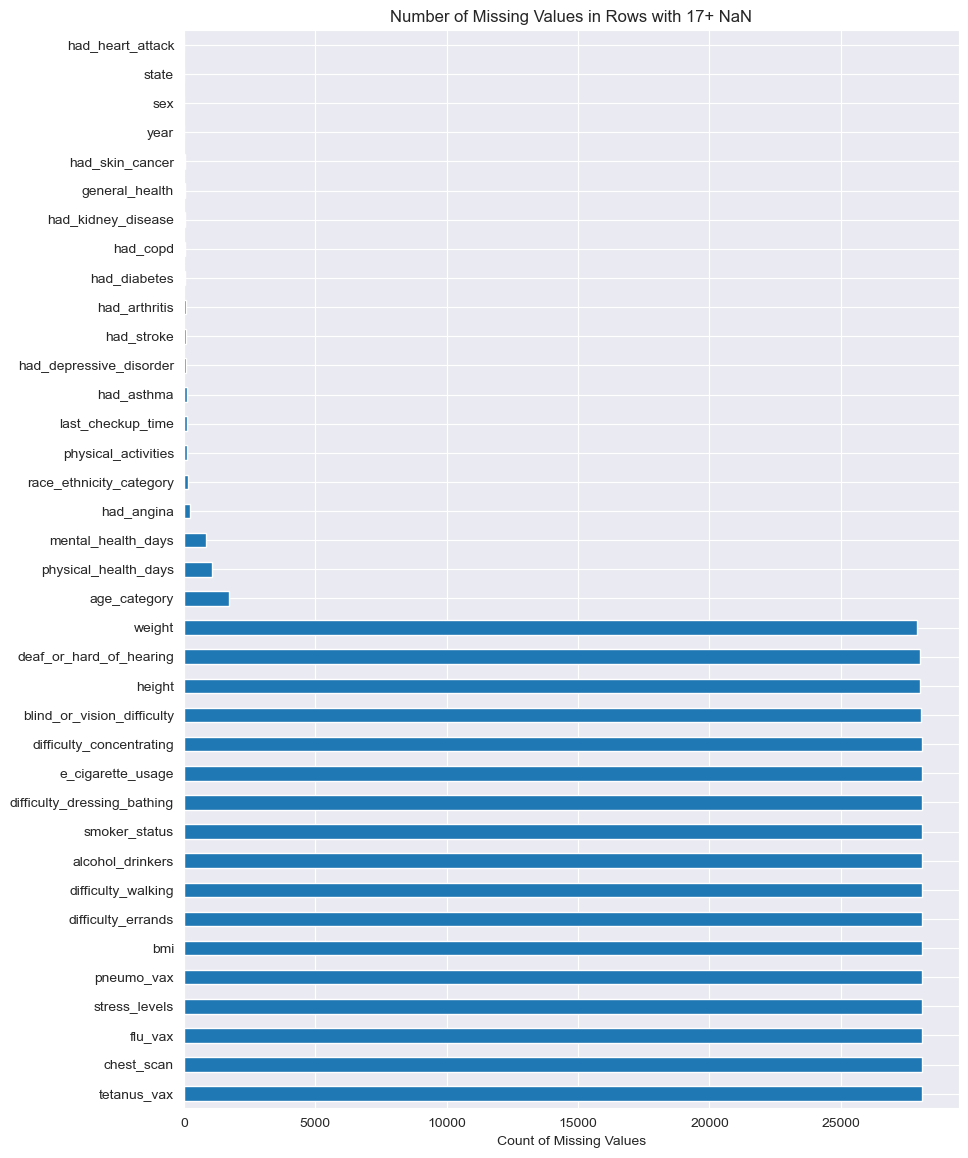

In [44]:
# plot the number of missing values per feature/survey question 
plt.figure(figsize=(10, 14))

# count the number of missing values each feature, sort with descending order
row_18_na_df.isna().sum().sort_values(ascending=False).plot(kind='barh')
plt.title('Number of Missing Values in Rows with 17+ NaN')
plt.xlabel('Count of Missing Values')

plt.show()

**Takeaways**:
- There are 17 commonly missed questions, which is consistent with the number of missing questions per row.
- Survey questions such as `tetanus_vax`, `pneumo_vax`, `flu_vax` may be skipped by respondents as they do not know or cannot recall such information. All three vaccination questions exhibit a high frequency of missing values, which is understandable, as many individuals may not be aware of the vaccinations they have received.
- Survey questions such as `difficulty_walking`, `difficulty_concentrating` and `stress_levels` may be skipped due to vague descriptions or options.

#### Analysis of respondents who has 8 to 16 missing values per observations

In [45]:
# filter rows with 9-17 missing values
row_816_na_df = heart_attack_clean[heart_attack_clean.isna().sum(axis=1).isin(range(8, 17))]

In [46]:
# get the total number of observations in the subset
print('Total number of observations in subset with 8 to 16 missing values per row: ', row_816_na_df.shape[0])


Total number of observations in subset with 8 to 16 missing values per row:  26750


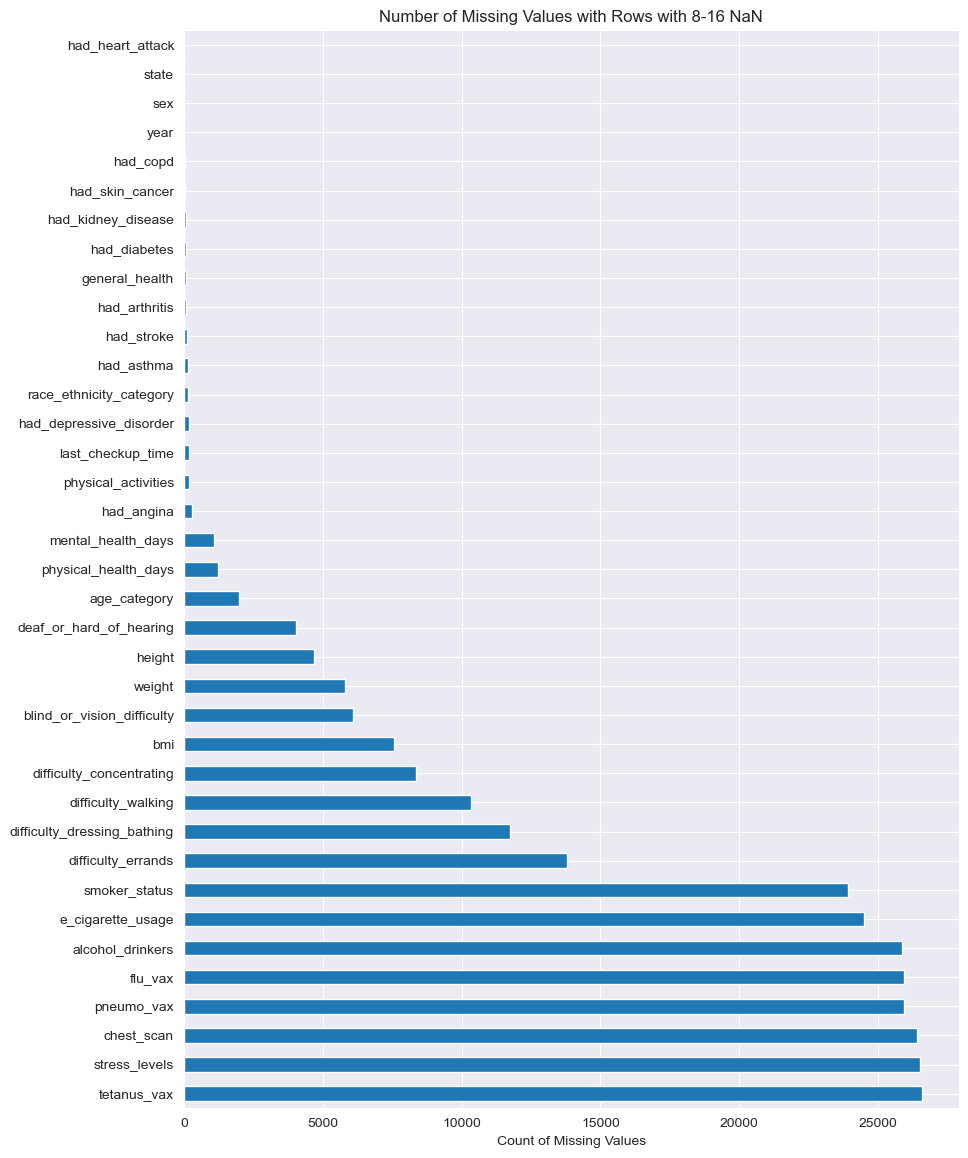

In [47]:
# plot the number of missing values per feature/survey question 
plt.figure(figsize=(10, 14))

# count the number of missing values each feature, sort with descending order
row_816_na_df.isna().sum().sort_values(ascending=False).plot(kind='barh')
plt.title('Number of Missing Values with Rows with 8-16 NaN')
plt.xlabel('Count of Missing Values')

plt.show()

**Takeaways**:
- There are 8 commonly missed questions (from`smoker_status` to `tetanus_vax`), which is consistent with the bump at 8 missing values per row found in the Data Quality Check.
- All of the variable collapsed with those found in the previous analysis of 17+ missing values per row.
- **The systematic pattern of missing values can introduce bias into analyses and distort model performance in real-world applications if values for these observations are imputed. Therefore, I will drop rows that contain 8 or more missing values, which corresponds to 22% or more missing data per row.**

---

#### Actions - Drop rows with 8 or more missing values
- Before dropping any rows, I will first assess the percentage of total observations that will be removed. If this percentage does not significantly compromise the integrity of the dataset, I will proceed with the removal.

- Additional exploratory data analysis (EDA) on missing values will be conducted in later sections to further understand the patterns and identify optimal solutions.

In [48]:
# Get the number of rows to be dropped 
drop_count = heart_attack_clean.isna().sum(axis=1).loc[lambda x: x >= 8].count()
print('Number of rows to be dropped in this stage is:', drop_count)
print(f'Dropping {(drop_count / heart_attack_raw.shape[0]):.1%} observations')

Number of rows to be dropped in this stage is: 54838
Dropping 6.2% observations


- Dropping 6.2% is a relatively small portion of the dataset, and the majority of data remains intact and capable of providing reliable results

In [49]:
# Update drop counter
drop_counter += drop_count

In [50]:
# Show drop counter
print(f'Total number of rows have been dropped by this stage: {drop_counter}')

Total number of rows have been dropped by this stage: 60471


In [51]:
# Get the count of missing values per row 
heart_attack_clean.isna().sum(axis=1).value_counts().sort_index()

0     222781
1     160971
2     193888
3     179063
4      27231
5      16977
6      12033
7       5040
8       8968
9       3110
10      2605
11      2635
12      2294
13      2201
14      2660
15       582
16      1695
17     24551
18      2945
19       476
20        71
21        19
22         5
23         7
24         3
25         2
26         5
27         4
Name: count, dtype: int64

In [52]:
# Get the dataset shape before dropping
print('Dataset shape before dropping is:', heart_attack_clean.shape)
print('Number of rows to be dropped in this stage is:', drop_count)

Dataset shape before dropping is: (872822, 37)
Number of rows to be dropped in this stage is: 54838


In [53]:
# Drop rows with 8 or more missing values, which equats to keep rows nans less than 8
heart_attack_clean = heart_attack_clean.loc[heart_attack_clean.isna().sum(axis=1) < 8, :]

In [54]:
# Sanity check 
print('Updated dataset shape is:', heart_attack_clean.shape)

Updated dataset shape is: (817984, 37)


In [55]:
# Sanity check: count of missing values per row
heart_attack_clean.isna().sum(axis=1).value_counts().sort_index()

0    222781
1    160971
2    193888
3    179063
4     27231
5     16977
6     12033
7      5040
Name: count, dtype: int64

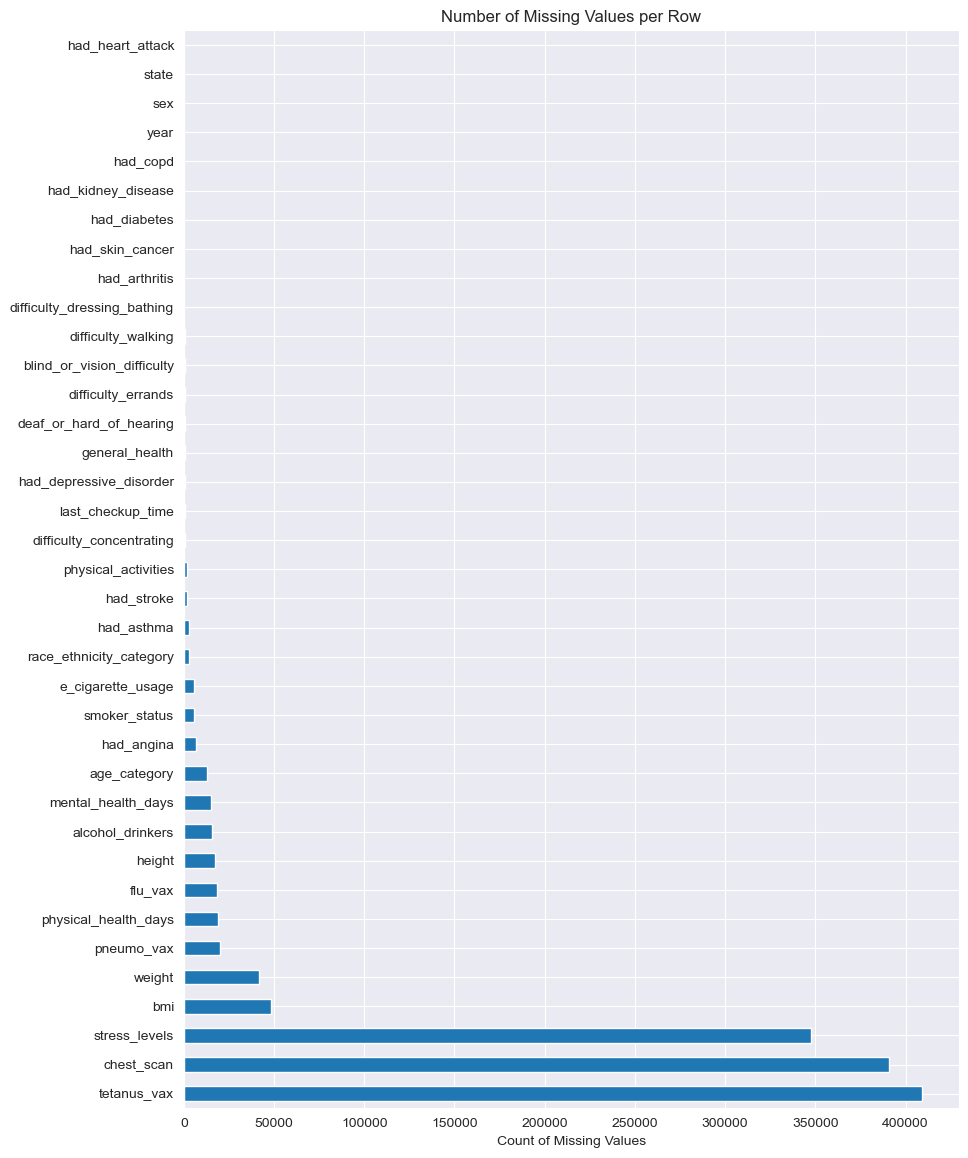

In [56]:
# Plot the number of missing values per feature/survey question 
plt.figure(figsize=(10, 14))

# Count the number of missing values each feature, sort with descending order
heart_attack_clean.isna().sum().sort_values(ascending=False).plot(kind='barh')
plt.title('Number of Missing Values per Row')
plt.xlabel('Count of Missing Values')

plt.show()

**Takeaways**
- There are still significant missing values in features such as `stress_levels`, `chest_scan`, and `tetanus_vax`, and these are the three columns that contain over 45% of missing values within the columns. A more detailed analysis will be performed later in this section to understand what causes such issue.
- Excluding `stress_levels`, `chest_scan`, and `tetanus_vax`, the systematic pattern of multiple questions exhibiting similar levels of missing values has been addressed. As a result, the updated dataset is now more reliable. 
---

#### 5.3.4 Missing Values in Columns  <a class="anchor" id="5'c4"></a>

Check the percentage of missing values within each feature

In [57]:
# Update missing_values_df
missing_value_df = pd.DataFrame({
    'Missing Value Count': heart_attack_clean.isna().sum().sort_values(ascending=False),
    'Missing Value Percentage': ((heart_attack_clean.isna().sum()/heart_attack_clean.shape[0]).sort_values(ascending=False) * 100).round(2)
})
missing_value_df

Missing Value Count  Missing Value Percentage
tetanus_vax                               409086                     50.01
chest_scan                                391055                     47.81
stress_levels                             347627                     42.50
bmi                                        48191                      5.89
weight                                     41444                      5.07
pneumo_vax                                 20132                      2.46
physical_health_days                       18787                      2.30
flu_vax                                    18211                      2.23
height                                     17215                      2.10
alcohol_drinkers                           15488                      1.89
mental_health_days                         14781                      1.81
age_category                               12662                      1.55
had_angina                                  6640                      0.81
smoker_status                               5669                      0.69
e_cigarette_usage                           5492                      0.67
race_ethnicity_category                     3083                      0.38
had_asthma                                  2592                      0.32
had_stroke                                  1947                      0.24
physical_activities                         1823                      0.22
difficulty_concentrating                     897                      0.11
last_checkup_time                            857                      0.10
had_depressive_disorder                      563                      0.07
general_health                               524                      0.06
deaf_or_hard_of_hearing                      475                      0.06
difficulty_errands                           468                      0.06
blind_or_vision_difficulty                   385                      0.05
difficulty_walking                           369                      0.05
difficulty_dressing_bathing                  218                      0.03
had_arthritis                                125                      0.02
had_skin_cancer                              111                      0.01
had_diabetes                                 109                      0.01
had_kidney_disease                           106                      0.01
had_copd                                      91                      0.01
year                                           0                      0.00
sex                                            0                      0.00
state                                          0                      0.00
had_heart_attack                               0                      0.00

- Since dropping missing values for features with less than 2% missing data has a minimal impact on the overall dataset, it helps maintain the integrity of the analysis without significantly compromising the sample size or introducing bias. Additionally, a cleaner dataset can facilitate more effective imputation of missing values conducted in later stages.

In [58]:
# Filter the columns that has under 2% missing values, greater than zero at the same time
drop_col = [col for col in heart_attack_clean.columns 
              if (heart_attack_clean[col].isna().mean() >0) & (heart_attack_clean[col].isna().mean() < 0.02)]

In [59]:
# Calculate the number of rows to be dropped
drop_count = heart_attack_clean[drop_col].isna().any(axis=1).sum()
print('Number of rows to be dropped in this stage is:', drop_count)
print(f'Dropping {(drop_count / heart_attack_raw.shape[0]):.1%} observations')

Number of rows to be dropped in this stage is: 65644
Dropping 7.5% observations


In [60]:
# Update counter
drop_counter += drop_count

In [61]:
# Show drop counter
print(f'Total number of rows have been dropped by this stage: {drop_counter}')

Total number of rows have been dropped by this stage: 126115


In [62]:
# Drop missing values
heart_attack_clean.dropna(subset=drop_col, inplace=True)

In [63]:
# Sanity Check
# Update missing_values_df with new column name
missing_value_df = pd.DataFrame({
    'Missing Value Count': heart_attack_clean.isna().sum().sort_values(ascending=False),
    'Missing Value Percentage': ((heart_attack_clean.isna().sum()/heart_attack_clean.shape[0]).sort_values(ascending=False) * 100).round(2)
})
missing_value_df

Missing Value Count  Missing Value Percentage
tetanus_vax                               369628                     49.13
chest_scan                                355277                     47.22
stress_levels                             312360                     41.52
bmi                                        39088                      5.20
weight                                     33415                      4.44
height                                     12828                      1.71
physical_health_days                       12616                      1.68
pneumo_vax                                  6965                      0.93
flu_vax                                     5157                      0.69
year                                           0                      0.00
had_depressive_disorder                        0                      0.00
had_arthritis                                  0                      0.00
deaf_or_hard_of_hearing                        0                      0.00
blind_or_vision_difficulty                     0                      0.00
difficulty_errands                             0                      0.00
difficulty_walking                             0                      0.00
difficulty_concentrating                       0                      0.00
difficulty_dressing_bathing                    0                      0.00
had_diabetes                                   0                      0.00
last_checkup_time                              0                      0.00
had_kidney_disease                             0                      0.00
had_asthma                                     0                      0.00
had_copd                                       0                      0.00
had_skin_cancer                                0                      0.00
sex                                            0                      0.00
had_stroke                                     0                      0.00
had_angina                                     0                      0.00
mental_health_days                             0                      0.00
physical_activities                            0                      0.00
e_cigarette_usage                              0                      0.00
smoker_status                                  0                      0.00
general_health                                 0                      0.00
alcohol_drinkers                               0                      0.00
state                                          0                      0.00
age_category                                   0                      0.00
race_ethnicity_category                        0                      0.00
had_heart_attack                               0                      0.00

In [64]:
# Sanity check dataframe shape
print('Updated dataset shape is:', heart_attack_clean.shape)

Updated dataset shape is: (752340, 37)


1. Some columns still have missing values under 2%. This is due to the removal of rows with multiple missing values, which has reduced the missing counts in features such as  `flu_vax`, `pneumo_vax`, `physical_health_days`, and `height`.
2. Varaibles like `flu_vax`, `pneumo_vax`, `physical_health_days`, `height`, `weight`, `bmi` will be examined in the Exploratory Data Analysis section to investigate the potential causes of missing values and determine appropriate imputation strategies.
3. `tetanus_vax`, `chest_scan`, and `stress_levels` have significant number of missing values, I will investigate in the upcoming section.

---

#### 5.3.5 Columns with Considerable Missing Values  <a class="anchor" id="5c5"></a>

The variables `tetanus_vax`, `chest_scan`, and `stress_levels` exhibit a considerable amount of missing values. An in-depth investigation will be conducted to understand the underlying causes. I will:
1. Examine the `year` to determine if the missing values are consistent between 2022 and 2023.
2. Address the missing values in these columns based on the findings from the analysis.

In [65]:
# Create a list of columns to be investigated
col_investigate = ['tetanus_vax', 'chest_scan', 'stress_levels']

In [66]:
# Create the missing value DataFrame for 2022 raw data
missing_value_df_2022 = pd.DataFrame({
    'Missing Value Count' : heart_attack_clean[heart_attack_clean['year'] == 2022][col_investigate]\
                            .isna().sum(),
    'Missing Value Percentage' : (heart_attack_clean[heart_attack_clean['year'] == 2022][col_investigate]\
                                  .isna().mean() * 100).round(2)
    
}
).sort_index()
missing_value_df_2022

Missing Value Count  Missing Value Percentage
chest_scan                  355118                     94.18
stress_levels               169933                     45.07
tetanus_vax                 365221                     96.86

In [67]:
# Create the missing value DataFrame for 2022 raw data
missing_value_df_2023 = pd.DataFrame({
    'Missing Value Count' : heart_attack_clean[heart_attack_clean['year'] == 2023][col_investigate]\
                            .isna().sum(),
    'Missing Value Percentage' : (heart_attack_clean[heart_attack_clean['year'] == 2023][col_investigate]\
                                  .isna().mean() * 100).round(2)
    
}
).sort_index()
missing_value_df_2023

Missing Value Count  Missing Value Percentage
chest_scan                     159                      0.04
stress_levels               142427                     37.95
tetanus_vax                   4407                      1.17

**Takeaways**:
1. `stress_levels`: Both 2022 and 2023 data show considerable missing values, suggesting that the issue may stem from the survey question itself. The unclear definition of frequency options—'Never', 'Rarely', 'Sometimes', 'Usually', 'Always', and 'Unknown'—could lead to respondent confusion and skipped responses. Therefore, I will **impute 'unclear_frequency' for the missing values in `stress_levels`**.
2. `tetanus_vax`, `chest_scan`: The data collected in 2023 reveals a significant number of missing values for the `tetanus_vax` and `chest_scan` columns, whereas missing values were relatively low in 2022. This trend suggests that these survey questions may have been omitted from many responses in the 2023 survey, which could also explain the missing values observed in 2022. Therefore, I will **impute the missing values in `tetanus_vax` and `chest_scan` with the label 'not_asked'**.

In [68]:
# Impute 'unclear_frequency' to the missing values in stress_levels
print('Value counts of stress_levels before imputation:')
heart_attack_clean['stress_levels'].value_counts(dropna=False)

Value counts of stress_levels before imputation:


stress_levels
NaN          312360
Never        167415
Rarely       122243
Sometimes     98551
Usually       29825
Always        20888
Unknown        1058
Name: count, dtype: int64

In [69]:
# Fill na
heart_attack_clean['stress_levels'] = heart_attack_clean['stress_levels'].fillna('unclear_frequency')

# Sanity check
# Impute ''unclear_frequency' to the missing values in stress_levels
print('Value counts of stress_levels after imputation:')
heart_attack_clean['stress_levels'].value_counts(dropna=False)

Value counts of stress_levels after imputation:


stress_levels
unclear_frequency    312360
Never                167415
Rarely               122243
Sometimes             98551
Usually               29825
Always                20888
Unknown                1058
Name: count, dtype: int64

The imputation for `stress_levles` is now completed. I will now fix missing values in `tetanus_vax` and `chest_scan`.

---


In [70]:
# Get the value counts of tetanus_vax before imputation
print('Value counts of tetanus_vax before imputation:')
print(heart_attack_clean['tetanus_vax'].value_counts(dropna=False))

Value counts of tetanus_vax before imputation:
tetanus_vax
NaN                           369628
No tetanus shot               116422
Tetanus shot (unsure type)    108825
Received Tdap                  97729
Unknown                        33275
Tetanus shot (not Tdap)        26461
Name: count, dtype: int64


In [71]:
# Impute 'not_asked' to the missing values in tetanus_vax
heart_attack_clean['tetanus_vax'] = heart_attack_clean['tetanus_vax'].fillna('not_asked')

In [72]:
# Sanity check, check value counts after imputation
print('Value counts of tetanus_vax after imputation:')
print(heart_attack_clean['tetanus_vax'].value_counts(dropna=False))

Value counts of tetanus_vax after imputation:
tetanus_vax
not_asked                     369628
No tetanus shot               116422
Tetanus shot (unsure type)    108825
Received Tdap                  97729
Unknown                        33275
Tetanus shot (not Tdap)        26461
Name: count, dtype: int64


The NaN in `tetanus_vax` has successfully been replaced with 'not_asked', I will now address missing values in `chest_scan`.

---

In [73]:
# Get the value counts of chest_scan before imputation
print('Value counts of chest_scan before imputation:')
print(heart_attack_clean['chest_scan'].value_counts(dropna=False))

Value counts of chest_scan before imputation:
chest_scan
NaN        355277
No         220801
Yes        161020
Unknown     15242
Name: count, dtype: int64


In [74]:
# Impute 'not_asked' to the missing values in chest_scan
heart_attack_clean['chest_scan'] = heart_attack_clean['chest_scan'].fillna('not_asked')

In [75]:
# Sanity check, check value counts after imputation
print('Value counts of chest_scan after imputation:')
print(heart_attack_clean['chest_scan'].value_counts(dropna=False))

Value counts of chest_scan after imputation:
chest_scan
not_asked    355277
No           220801
Yes          161020
Unknown       15242
Name: count, dtype: int64


The NaN in `chest_scan` has successfully been replaced with 'not_asked'.

---

Check the updated missing values in columns.

In [76]:
# Sanity check
# Update missing_values_df 
missing_value_df = pd.DataFrame({
    'Missing Value Count': heart_attack_clean.isna().sum().sort_values(ascending=False),
    'Missing Value Percentage': ((heart_attack_clean.isna().sum()/heart_attack_clean.shape[0]).sort_values(ascending=False) * 100).round(2)
})
missing_value_df

Missing Value Count  Missing Value Percentage
bmi                                        39088                      5.20
weight                                     33415                      4.44
height                                     12828                      1.71
physical_health_days                       12616                      1.68
pneumo_vax                                  6965                      0.93
flu_vax                                     5157                      0.69
year                                           0                      0.00
had_depressive_disorder                        0                      0.00
had_arthritis                                  0                      0.00
deaf_or_hard_of_hearing                        0                      0.00
blind_or_vision_difficulty                     0                      0.00
difficulty_walking                             0                      0.00
difficulty_errands                             0                      0.00
difficulty_concentrating                       0                      0.00
difficulty_dressing_bathing                    0                      0.00
had_diabetes                                   0                      0.00
last_checkup_time                              0                      0.00
chest_scan                                     0                      0.00
tetanus_vax                                    0                      0.00
had_kidney_disease                             0                      0.00
had_asthma                                     0                      0.00
had_copd                                       0                      0.00
had_skin_cancer                                0                      0.00
sex                                            0                      0.00
had_stroke                                     0                      0.00
had_angina                                     0                      0.00
stress_levels                                  0                      0.00
mental_health_days                             0                      0.00
physical_activities                            0                      0.00
e_cigarette_usage                              0                      0.00
smoker_status                                  0                      0.00
general_health                                 0                      0.00
alcohol_drinkers                               0                      0.00
state                                          0                      0.00
age_category                                   0                      0.00
race_ethnicity_category                        0                      0.00
had_heart_attack                               0                      0.00

---

### 5.4 Drop Duplicated Rows <a class="anchor" id="5d"></a>

In [77]:
# Check duplicated rows
print('Number of duplicated rows:', heart_attack_clean.duplicated().sum())
print(f'Percentage of duplicated rows: {(heart_attack_clean.duplicated().mean()):.2%}')

Number of duplicated rows: 341
Percentage of duplicated rows: 0.05%


In [78]:
# Check duplicated rows
heart_attack_clean[heart_attack_clean.duplicated(keep=False)].sort_values(by='bmi').head(10)

year     sex race_ethnicity_category age_category     state  height  \
3959    2022  Female                   White        70-74   Alabama    1.68   
1062    2022  Female                   White        70-74   Alabama    1.68   
158274  2023  Female                   White        65-69  Maryland    1.65   
158614  2023  Female                   White        65-69  Maryland    1.65   
4052    2022  Female                   White        65-69   Alabama    1.68   
1184    2022  Female                   White        65-69   Alabama    1.68   
1048    2022  Female                   Asian        50-54   Alabama    1.73   
3947    2022  Female                   Asian        50-54   Alabama    1.73   
1143    2022    Male                   Black        18-24   Alabama    1.73   
4023    2022    Male                   Black        18-24   Alabama    1.73   

        weight    bmi alcohol_drinkers general_health  ... difficulty_walking  \
3959     46.27  16.39               No      Very good  ...                 No   
1062     46.27  16.39               No      Very good  ...                 No   
158274   45.36  16.66              Yes           Good  ...                 No   
158614   45.36  16.66              Yes           Good  ...                 No   
4052     47.63  16.88              Yes           Good  ...                Yes   
1184     47.63  16.88              Yes           Good  ...                Yes   
1048     52.16  17.43              Yes           Good  ...                 No   
3947     52.16  17.43              Yes           Good  ...                 No   
1143     54.43  18.19               No      Very good  ...                 No   
4023     54.43  18.19               No      Very good  ...                 No   

       difficulty_concentrating difficulty_dressing_bathing  \
3959                         No                          No   
1062                         No                          No   
158274                       No                          No   
158614                       No                          No   
4052                         No                          No   
1184                         No                          No   
1048                         No                          No   
3947                         No                          No   
1143                         No                          No   
4023                         No                          No   

        difficulty_errands  last_checkup_time chest_scan flu_vax  \
3959                    No          Past year  not_asked      No   
1062                    No          Past year  not_asked      No   
158274                  No          Past year        Yes     Yes   
158614                  No          Past year        Yes     Yes   
4052                   Yes          Past year  not_asked     Yes   
1184                   Yes          Past year  not_asked     Yes   
1048                    No          Past year  not_asked     Yes   
3947                    No          Past year  not_asked     Yes   
1143                   Yes     Past 1-2 years  not_asked      No   
4023                   Yes     Past 1-2 years  not_asked      No   

          tetanus_vax pneumo_vax had_heart_attack  
3959        not_asked         No               No  
1062        not_asked         No               No  
158274  Received Tdap        Yes               No  
158614  Received Tdap        Yes               No  
4052        not_asked        Yes               No  
1184        not_asked        Yes               No  
1048        not_asked         No               No  
3947        not_asked         No               No  
1143        not_asked        Yes               No  
4023        not_asked        Yes               No  

[10 rows x 37 columns]

Duplicated rows can introduce bias into analysis and modeling. Upon examining the dataset, I found 341 rows that are duplicated twice. This number is relatively small compared to the overall size of the dataset. Therefore, these duplicate rows will be dropped directly.

In [79]:
# Calculate the number of rows to be dropped
drop_count = heart_attack_clean.duplicated().sum()
print('Number of rows to be dropped in this stage is:', drop_count)
print(f'Dropping {(drop_count / heart_attack_clean.shape[0]):.2%} observations')

Number of rows to be dropped in this stage is: 341
Dropping 0.05% observations


In [80]:
# Update counter
drop_counter += drop_count

In [81]:
# Show drop counter
print(f'Total number of rows have been dropped by this stage: {drop_counter}')

Total number of rows have been dropped by this stage: 126456


In [82]:
 # Drop duplicated rows
heart_attack_clean = heart_attack_clean[heart_attack_clean.duplicated() == False]

In [83]:
# Sanity check
heart_attack_clean.duplicated().sum()

0

Duplicated rows have been successfully dropped, the part of data preprocessing is over.

---

### 5.5 Summary and Export <a class="anchor" id="5e"></a>

By far, the following updates have been made:

| Changes made | Description      |
|-----------|------------------|
|    Columns order     | Columns have been reordered to place the target variable as the last column. |
| Renaming columns and categories        | Columns renamed to camel case format; category names made more succinct.   |
| Missing values in Target Variable        |Dropped missing values in `had_heart_heart`. |
| Missing values in `bmi`        | Calculated missing `bmi` values using the formula based on `height` and `weight`. |
| Missing values in rows        | Dropped rows with 9 or more missing values per row. |
| Missing values in columns        | Dropped missing values from features with 2% or less missing data. |
| Impute missing values  | Introduced new categories for missing values in `tetanus_vax`, `chest_scan`, and `stress_levels`.      |
| Duplicated rows  | Removed rows with duplicate data.      |


In [84]:
# Print the shape of original DataFrame
print(f'The original DataFrame shape is: {heart_attack_raw.shape}')

# Print the number of rows dropped
print(f'Total number of rows that are dropped: {drop_counter}')

# Print the shape of updated DataFrame
print(f'The updated DataFrame shape is: {heart_attack_clean.shape}')

The original DataFrame shape is: (878455, 37)
Total number of rows that are dropped: 126456
The updated DataFrame shape is: (751999, 37)


In [ ]:
# Export the dataset
heart_attack_clean.to_csv("../data/processed/heart_attack_clean_stage1.csv", index=False)
